# Assignment
In this project you must create a web service that uses machine learning to make pre-dictions based on the data setpowerproductionavailable on Moodle.  
The goal is toproduce a model that accurately predicts wind turbinepoweroutput from windspeedvalues, 
as in the data set.  You must then develop a web service that will respond withpredicted power values 
based on speed values sent as HTTP requests.  Your submissionmust be in the form of a git repository containing,
at a minimum, the following items
    
1.  Jupyter  notebook  that  trains  a  model  using  the  data  set.   In  the  notebook  youshould explain your model and give an analysis of its accuracy.
2.  Python script that runs a web service based on the model, as above.
3.  Dockerfile to build and run the web service in a container.
4.  Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more thanone model.  Rest assured, all the above concepts will be explored in lecture videos andother materials in the coming semester


# Power production
The powerproduction dataset contains speed(x) and power values(y) . The data set contains 500 cases so a scatter 
plot will be used to represent the data in a visual manner.

In [1]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
# Seaborn plots
sb.set()

# Find and read the powerproduction dataframe
data = pd.read_csv('powerproduction.csv')
df = pd.DataFrame(data)
df


speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]

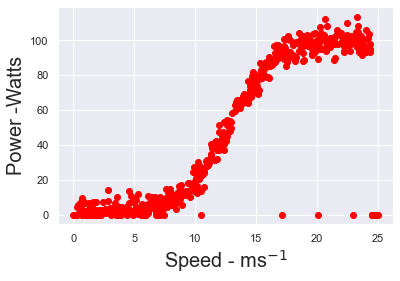

In [3]:
# X and y values for regression
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

def scatterPlot(X, y):# Scatter plot
    plt.scatter(X, y, color="red");
    plt.xlabel("Speed - ms$^{-1}$", fontsize=20)
    plt.ylabel("Power -Watts", fontsize=20)  
scatterPlot(X, y)

In [4]:
print(data.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


The scatter plots shows a few outliers present in the dataset. These outliers are probably a computer malfunction or mechanical issue with the windmill.
To avoid these points from skewing our data and decreaseing it's accuracy they will be removed. While these means the 
data set is slightly smaller it gives us a more accurate set to work with.

In [5]:
# Locate data points where speed is > 10 and power is = 0
data.loc[(data['power'] == 0 ) & (data['speed'] > 10)]

speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

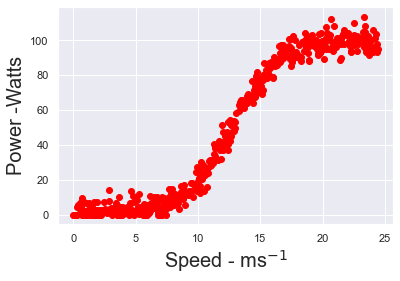

In [6]:
# New more accurate dataset to work with
data = data.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]);
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
X = X.reshape(-1, 1)
scatterPlot(X, y)

# Decision Tree Regression

One of the most common and practical approaches to machine learning .A Regression will be performed using the DecisionTreeRegressor. The function is a method to obtain a line
of best fit, given a dependent variable (power) and an independent variavle (speed).
The slope is determined with

$$ y=a+bx $$

This is only a line of best fit, in fact most points won't be on the line at all. To calculate the error we use

$$ error = y(real)-y(predicted) = y(real)-(a+bx) $$


For now we will be just using LinearRegresion functional call intercept_ which will to perform the slope calculation.


https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c


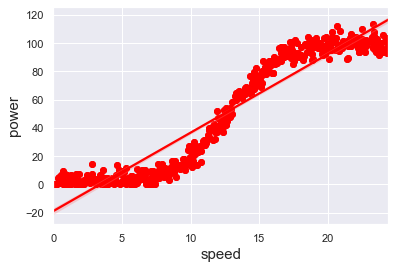

In [7]:
def regPlot(X, y):# Linear regression plot
    plt.scatter(X, y, color="red");
    plt.xlabel("Speed - ms$^{-1}$", fontsize=15) 
    plt.ylabel("Power -Watts", fontsize=15) 
    sb.regplot(x='speed',y='power',data = data, color = "red") 
   
regPlot(X, y)



In [8]:
import sklearn.linear_model as linReg

x = data["speed"].to_numpy()
y = data["power"].to_numpy()
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
x = x.reshape(-1, 1)
model = linReg.LinearRegression()
model.fit(x, y)
regression = model.score(x, y)
print("Regression for this model is " , regression)

print("The slope and intercept of the line best fit is ", model.intercept_)
print("The coefficient of the model is ", model.coef_)

p = [model.intercept_, model.coef_]

# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb
def fill(x, p):
    return p[0] + x * p[1]

def linPredict(x):
    return fill(x,p)

# Linear Regression Predictions
print("Power: 10 Speed:", linPredict(10))
print("Power: 15 Speed:", linPredict(15))
print("Power: 20 Speed:", linPredict(20))
print("Power: 25 Speed:", linPredict(25))
print("Power: 30 Speed:", linPredict(30))



Regression for this model is  0.9025487607456801
The slope and intercept of the line best fit is  -18.87009060732686
The coefficient of the model is  [5.5509909]
Power: 10 Speed: [36.63981839]
Power: 15 Speed: [64.39477288]
Power: 20 Speed: [92.14972738]
Power: 25 Speed: [119.90468188]
Power: 30 Speed: [147.65963638]


# Training and Testing Data Sets

The train_test_split import from the sklearn.model_selection package randomly split up the data set into two
sepearte sets. One for training on, one for testing on. Since it is important to train with a good
spread of values it is better to randomly choose points for each data set. 

It's better to have a larger training set, this can be programmed with the test_size parameter. For this 
training I will be setting the test data set to be 20% of the total dataset

In [9]:
# Decision tree regression
from sklearn.model_selection import train_test_split
# Test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Sigmoid Activation

The activation function is treated as a middle man between the unput of the current
neuron and the output to the next one. The graph resembles a sigmoid function with a noticable "S" shaped curve.
$$ S(x) = \frac{1}{1 +e^-x} $$

Sigmoid function returns a value between 0 and 1

The data set contains 500 data points so for the first layer all of the data points will be used. Then two more dense layers containing 500 neurons each and the output layer with just 1 neuron.

In [10]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.tree import DecisionTreeRegressor
# Create layers for model
inputLayer = Input(shape=(None, 1))
denseLayer1 = Dense(500, activation='sigmoid')(inputLayer)
denseLayer2 = Dense(500, activation='sigmoid')(denseLayer1)
denseLayer3 = Dense(500, activation='sigmoid')(denseLayer2)
output = Dense(1)(denseLayer3)
model = Model(inputLayer, outputs=output)

regressor = DecisionTreeRegressor();
regressor.fit(X_train, y_train);


model = Model(inputs=inputLayer, outputs=output)
model.compile( optimizer="adam",loss="mean_squared_error",  metrics=["mean_squared_error", "mean_absolute_error"])

# https://keras.io/getting_started/intro_to_keras_for_engineers/

# Train the model for 500 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=500)

# Train the model for 500 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=500)

Fit on NumPy data
Epoch 1/500
7/7 [==============================] - 0s 5ms/step - loss: 3769.6855 - mean_squared_error: 3769.6855 - mean_absolute_error: 46.4183
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 3003.7668 - mean_squared_error: 3003.7668 - mean_absolute_error: 42.7118
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 2800.5776 - mean_squared_error: 2800.5776 - mean_absolute_error: 42.1279
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 2684.5857 - mean_squared_error: 2684.5857 - mean_absolute_error: 41.8011
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 2586.2097 - mean_squared_error: 2586.2097 - mean_absolute_error: 41.5063
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2505.7739 - mean_squared_error: 2505.7739 - mean_absolute_error: 41.3552
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 2422.8403 - mean_squared_error: 2422.8403 - mea

7/7 [==============================] - 0s 8ms/step - loss: 1753.6083 - mean_squared_error: 1753.6083 - mean_absolute_error: 39.6698
Epoch 58/500
7/7 [==============================] - 0s 8ms/step - loss: 1753.0035 - mean_squared_error: 1753.0035 - mean_absolute_error: 39.6738
Epoch 59/500
7/7 [==============================] - 0s 7ms/step - loss: 1752.0817 - mean_squared_error: 1752.0817 - mean_absolute_error: 39.6632
Epoch 60/500
7/7 [==============================] - 0s 5ms/step - loss: 1750.5096 - mean_squared_error: 1750.5096 - mean_absolute_error: 39.6401
Epoch 61/500
7/7 [==============================] - 0s 5ms/step - loss: 1749.3326 - mean_squared_error: 1749.3326 - mean_absolute_error: 39.6188
Epoch 62/500
7/7 [==============================] - 0s 5ms/step - loss: 1747.8666 - mean_squared_error: 1747.8666 - mean_absolute_error: 39.6017
Epoch 63/500
7/7 [==============================] - 0s 5ms/step - loss: 1746.6902 - mean_squared_error: 1746.6902 - mean_absolute_error: 39.579

7/7 [==============================] - 0s 7ms/step - loss: 29.6877 - mean_squared_error: 29.6877 - mean_absolute_error: 4.1277
Epoch 115/500
7/7 [==============================] - 0s 7ms/step - loss: 28.3631 - mean_squared_error: 28.3631 - mean_absolute_error: 4.0732
Epoch 116/500
7/7 [==============================] - 0s 6ms/step - loss: 28.2767 - mean_squared_error: 28.2767 - mean_absolute_error: 4.0973
Epoch 117/500
7/7 [==============================] - 0s 5ms/step - loss: 27.4412 - mean_squared_error: 27.4412 - mean_absolute_error: 4.0087
Epoch 118/500
7/7 [==============================] - 0s 6ms/step - loss: 27.3089 - mean_squared_error: 27.3089 - mean_absolute_error: 4.1065
Epoch 119/500
7/7 [==============================] - 0s 7ms/step - loss: 24.6345 - mean_squared_error: 24.6345 - mean_absolute_error: 3.8602
Epoch 120/500
7/7 [==============================] - 0s 6ms/step - loss: 24.4838 - mean_squared_error: 24.4838 - mean_absolute_error: 3.8640
Epoch 121/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 26.3780 - mean_squared_error: 26.3780 - mean_absolute_error: 3.9832
Epoch 173/500
7/7 [==============================] - 0s 5ms/step - loss: 24.2267 - mean_squared_error: 24.2267 - mean_absolute_error: 3.9031
Epoch 174/500
7/7 [==============================] - 0s 6ms/step - loss: 18.5781 - mean_squared_error: 18.5781 - mean_absolute_error: 3.4222
Epoch 175/500
7/7 [==============================] - 0s 5ms/step - loss: 17.8069 - mean_squared_error: 17.8069 - mean_absolute_error: 3.3903
Epoch 176/500
7/7 [==============================] - 0s 5ms/step - loss: 19.1025 - mean_squared_error: 19.1025 - mean_absolute_error: 3.4579
Epoch 177/500
7/7 [==============================] - 0s 7ms/step - loss: 17.9714 - mean_squared_error: 17.9714 - mean_absolute_error: 3.3731
Epoch 178/500
7/7 [==============================] - 0s 6ms/step - loss: 18.8917 - mean_squared_error: 18.8917 - mean_absolute_error: 3.4116
Epoch 179/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 19.1901 - mean_squared_error: 19.1901 - mean_absolute_error: 3.5045
Epoch 231/500
7/7 [==============================] - 0s 6ms/step - loss: 17.5069 - mean_squared_error: 17.5069 - mean_absolute_error: 3.3124
Epoch 232/500
7/7 [==============================] - 0s 5ms/step - loss: 17.8088 - mean_squared_error: 17.8088 - mean_absolute_error: 3.2910
Epoch 233/500
7/7 [==============================] - 0s 6ms/step - loss: 17.4607 - mean_squared_error: 17.4607 - mean_absolute_error: 3.3088
Epoch 234/500
7/7 [==============================] - 0s 8ms/step - loss: 18.6003 - mean_squared_error: 18.6003 - mean_absolute_error: 3.4163
Epoch 235/500
7/7 [==============================] - 0s 7ms/step - loss: 17.3133 - mean_squared_error: 17.3133 - mean_absolute_error: 3.2805
Epoch 236/500
7/7 [==============================] - 0s 6ms/step - loss: 16.5339 - mean_squared_error: 16.5339 - mean_absolute_error: 3.2713
Epoch 237/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 17.9467 - mean_squared_error: 17.9467 - mean_absolute_error: 3.3677
Epoch 289/500
7/7 [==============================] - 0s 6ms/step - loss: 17.4218 - mean_squared_error: 17.4218 - mean_absolute_error: 3.3043
Epoch 290/500
7/7 [==============================] - 0s 5ms/step - loss: 16.7022 - mean_squared_error: 16.7022 - mean_absolute_error: 3.2490
Epoch 291/500
7/7 [==============================] - 0s 5ms/step - loss: 16.8433 - mean_squared_error: 16.8433 - mean_absolute_error: 3.2386
Epoch 292/500
7/7 [==============================] - 0s 6ms/step - loss: 18.0735 - mean_squared_error: 18.0735 - mean_absolute_error: 3.3870
Epoch 293/500
7/7 [==============================] - 0s 5ms/step - loss: 16.5586 - mean_squared_error: 16.5586 - mean_absolute_error: 3.2383
Epoch 294/500
7/7 [==============================] - 0s 5ms/step - loss: 16.9251 - mean_squared_error: 16.9251 - mean_absolute_error: 3.3030
Epoch 295/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.1678 - mean_squared_error: 16.1678 - mean_absolute_error: 3.2096
Epoch 347/500
7/7 [==============================] - 0s 6ms/step - loss: 18.0055 - mean_squared_error: 18.0055 - mean_absolute_error: 3.3486
Epoch 348/500
7/7 [==============================] - 0s 6ms/step - loss: 17.6823 - mean_squared_error: 17.6823 - mean_absolute_error: 3.3148
Epoch 349/500
7/7 [==============================] - 0s 7ms/step - loss: 21.7232 - mean_squared_error: 21.7232 - mean_absolute_error: 3.7034
Epoch 350/500
7/7 [==============================] - 0s 7ms/step - loss: 17.7330 - mean_squared_error: 17.7330 - mean_absolute_error: 3.3174
Epoch 351/500
7/7 [==============================] - 0s 6ms/step - loss: 17.5243 - mean_squared_error: 17.5243 - mean_absolute_error: 3.2971
Epoch 352/500
7/7 [==============================] - 0s 5ms/step - loss: 16.7761 - mean_squared_error: 16.7761 - mean_absolute_error: 3.2791
Epoch 353/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 17.1701 - mean_squared_error: 17.1701 - mean_absolute_error: 3.2997
Epoch 405/500
7/7 [==============================] - 0s 7ms/step - loss: 17.1178 - mean_squared_error: 17.1178 - mean_absolute_error: 3.2907
Epoch 406/500
7/7 [==============================] - 0s 7ms/step - loss: 17.7026 - mean_squared_error: 17.7026 - mean_absolute_error: 3.3801
Epoch 407/500
7/7 [==============================] - 0s 7ms/step - loss: 16.8092 - mean_squared_error: 16.8092 - mean_absolute_error: 3.2402
Epoch 408/500
7/7 [==============================] - 0s 7ms/step - loss: 17.5627 - mean_squared_error: 17.5627 - mean_absolute_error: 3.3413
Epoch 409/500
7/7 [==============================] - 0s 6ms/step - loss: 16.8891 - mean_squared_error: 16.8891 - mean_absolute_error: 3.2439
Epoch 410/500
7/7 [==============================] - 0s 6ms/step - loss: 16.8362 - mean_squared_error: 16.8362 - mean_absolute_error: 3.2984
Epoch 411/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 16.2937 - mean_squared_error: 16.2937 - mean_absolute_error: 3.2056
Epoch 463/500
7/7 [==============================] - 0s 5ms/step - loss: 16.7939 - mean_squared_error: 16.7939 - mean_absolute_error: 3.2459
Epoch 464/500
7/7 [==============================] - 0s 5ms/step - loss: 16.6989 - mean_squared_error: 16.6989 - mean_absolute_error: 3.2028
Epoch 465/500
7/7 [==============================] - 0s 5ms/step - loss: 16.7926 - mean_squared_error: 16.7926 - mean_absolute_error: 3.2904
Epoch 466/500
7/7 [==============================] - 0s 5ms/step - loss: 17.0583 - mean_squared_error: 17.0583 - mean_absolute_error: 3.2516
Epoch 467/500
7/7 [==============================] - 0s 5ms/step - loss: 17.6741 - mean_squared_error: 17.6741 - mean_absolute_error: 3.3287
Epoch 468/500
7/7 [==============================] - 0s 6ms/step - loss: 17.9840 - mean_squared_error: 17.9840 - mean_absolute_error: 3.3231
Epoch 469/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.2211 - mean_squared_error: 16.2211 - mean_absolute_error: 3.1885
Epoch 21/500
7/7 [==============================] - 0s 6ms/step - loss: 16.2174 - mean_squared_error: 16.2174 - mean_absolute_error: 3.1888
Epoch 22/500
7/7 [==============================] - 0s 6ms/step - loss: 16.2209 - mean_squared_error: 16.2209 - mean_absolute_error: 3.1886
Epoch 23/500
7/7 [==============================] - 0s 6ms/step - loss: 16.2187 - mean_squared_error: 16.2187 - mean_absolute_error: 3.1887
Epoch 24/500
7/7 [==============================] - 0s 6ms/step - loss: 16.2205 - mean_squared_error: 16.2205 - mean_absolute_error: 3.1886
Epoch 25/500
7/7 [==============================] - 0s 6ms/step - loss: 16.2193 - mean_squared_error: 16.2193 - mean_absolute_error: 3.1887
Epoch 26/500
7/7 [==============================] - 0s 6ms/step - loss: 16.2202 - mean_squared_error: 16.2202 - mean_absolute_error: 3.1886
Epoch 27/500
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 16.1941 - mean_squared_error: 16.1941 - mean_absolute_error: 3.1898
Epoch 79/500
7/7 [==============================] - 0s 7ms/step - loss: 16.1934 - mean_squared_error: 16.1934 - mean_absolute_error: 3.1899
Epoch 80/500
7/7 [==============================] - 0s 8ms/step - loss: 16.1927 - mean_squared_error: 16.1927 - mean_absolute_error: 3.1899
Epoch 81/500
7/7 [==============================] - 0s 7ms/step - loss: 16.1919 - mean_squared_error: 16.1919 - mean_absolute_error: 3.1900
Epoch 82/500
7/7 [==============================] - 0s 8ms/step - loss: 16.1912 - mean_squared_error: 16.1912 - mean_absolute_error: 3.1900
Epoch 83/500
7/7 [==============================] - 0s 7ms/step - loss: 16.1905 - mean_squared_error: 16.1905 - mean_absolute_error: 3.1901
Epoch 84/500
7/7 [==============================] - 0s 7ms/step - loss: 16.1898 - mean_squared_error: 16.1898 - mean_absolute_error: 3.1901
Epoch 85/500
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 16.1568 - mean_squared_error: 16.1568 - mean_absolute_error: 3.1910
Epoch 137/500
7/7 [==============================] - 0s 7ms/step - loss: 16.1562 - mean_squared_error: 16.1562 - mean_absolute_error: 3.1910
Epoch 138/500
7/7 [==============================] - 0s 7ms/step - loss: 16.1556 - mean_squared_error: 16.1556 - mean_absolute_error: 3.1910
Epoch 139/500
7/7 [==============================] - 0s 8ms/step - loss: 16.1549 - mean_squared_error: 16.1549 - mean_absolute_error: 3.1909
Epoch 140/500
7/7 [==============================] - 0s 8ms/step - loss: 16.1543 - mean_squared_error: 16.1543 - mean_absolute_error: 3.1909
Epoch 141/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1536 - mean_squared_error: 16.1536 - mean_absolute_error: 3.1909
Epoch 142/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1529 - mean_squared_error: 16.1529 - mean_absolute_error: 3.1909
Epoch 143/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.1178 - mean_squared_error: 16.1178 - mean_absolute_error: 3.1884
Epoch 194/500
7/7 [==============================] - 0s 7ms/step - loss: 16.1172 - mean_squared_error: 16.1172 - mean_absolute_error: 3.1884
Epoch 195/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1167 - mean_squared_error: 16.1167 - mean_absolute_error: 3.1883
Epoch 196/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1162 - mean_squared_error: 16.1162 - mean_absolute_error: 3.1883
Epoch 197/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1157 - mean_squared_error: 16.1157 - mean_absolute_error: 3.1882
Epoch 198/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1152 - mean_squared_error: 16.1152 - mean_absolute_error: 3.1882
Epoch 199/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1147 - mean_squared_error: 16.1147 - mean_absolute_error: 3.1881
Epoch 200/500
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 16.0900 - mean_squared_error: 16.0900 - mean_absolute_error: 3.1858
Epoch 252/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0895 - mean_squared_error: 16.0895 - mean_absolute_error: 3.1857
Epoch 253/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0890 - mean_squared_error: 16.0890 - mean_absolute_error: 3.1857
Epoch 254/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0886 - mean_squared_error: 16.0886 - mean_absolute_error: 3.1856
Epoch 255/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0881 - mean_squared_error: 16.0881 - mean_absolute_error: 3.1855
Epoch 256/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0876 - mean_squared_error: 16.0876 - mean_absolute_error: 3.1854
Epoch 257/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0872 - mean_squared_error: 16.0872 - mean_absolute_error: 3.1854
Epoch 258/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 16.0655 - mean_squared_error: 16.0655 - mean_absolute_error: 3.1812
Epoch 310/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0652 - mean_squared_error: 16.0652 - mean_absolute_error: 3.1811
Epoch 311/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0648 - mean_squared_error: 16.0648 - mean_absolute_error: 3.1810
Epoch 312/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0644 - mean_squared_error: 16.0644 - mean_absolute_error: 3.1809
Epoch 313/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0640 - mean_squared_error: 16.0640 - mean_absolute_error: 3.1808
Epoch 314/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0636 - mean_squared_error: 16.0636 - mean_absolute_error: 3.1807
Epoch 315/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0632 - mean_squared_error: 16.0632 - mean_absolute_error: 3.1806
Epoch 316/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 16.0455 - mean_squared_error: 16.0455 - mean_absolute_error: 3.1752
Epoch 368/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0452 - mean_squared_error: 16.0452 - mean_absolute_error: 3.1751
Epoch 369/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0449 - mean_squared_error: 16.0449 - mean_absolute_error: 3.1750
Epoch 370/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0446 - mean_squared_error: 16.0446 - mean_absolute_error: 3.1749
Epoch 371/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0443 - mean_squared_error: 16.0443 - mean_absolute_error: 3.1748
Epoch 372/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0440 - mean_squared_error: 16.0440 - mean_absolute_error: 3.1747
Epoch 373/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0437 - mean_squared_error: 16.0437 - mean_absolute_error: 3.1746
Epoch 374/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 16.0298 - mean_squared_error: 16.0298 - mean_absolute_error: 3.1696
Epoch 426/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0295 - mean_squared_error: 16.0295 - mean_absolute_error: 3.1695
Epoch 427/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0293 - mean_squared_error: 16.0293 - mean_absolute_error: 3.1694
Epoch 428/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0290 - mean_squared_error: 16.0290 - mean_absolute_error: 3.1693
Epoch 429/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0287 - mean_squared_error: 16.0287 - mean_absolute_error: 3.1692
Epoch 430/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0284 - mean_squared_error: 16.0284 - mean_absolute_error: 3.1691
Epoch 431/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0282 - mean_squared_error: 16.0282 - mean_absolute_error: 3.1690
Epoch 432/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 16.0135 - mean_squared_error: 16.0135 - mean_absolute_error: 3.1641
Epoch 484/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0132 - mean_squared_error: 16.0132 - mean_absolute_error: 3.1641
Epoch 485/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0130 - mean_squared_error: 16.0130 - mean_absolute_error: 3.1640
Epoch 486/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0127 - mean_squared_error: 16.0127 - mean_absolute_error: 3.1639
Epoch 487/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0124 - mean_squared_error: 16.0124 - mean_absolute_error: 3.1639
Epoch 488/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0121 - mean_squared_error: 16.0121 - mean_absolute_error: 3.1638
Epoch 489/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0118 - mean_squared_error: 16.0118 - mean_absolute_error: 3.1638
Epoch 490/500
7/7 [========